Prensesi İyileştir (Cure The
Princess) Veri Seti parçaları kullanılacak.

İki hidden layer’lı bir Multilayer Perceptron (MLP) oluşturun.
İlk hidden layer’da 100, ikinci hidden layer’da 50 nöron olsun. Hidden layer’larda ReLU, output layer’da sigmoid aktivasyonu olsun.

Output layer’da 1 nöron bulunuyor çünkü binary sınıflandırma yapıyoruz. Buna bağlı olarak binary cross entrophy loss kullanıyoruz.

Optimizasyon için Stochastic Gradient Descent kullandım. 

Batch size’ı 16 seçebilirsiniz.

**Diğerinden farklı olarak L1 ve Dropout regülarizasyonlar kodun ilgili kısımlarına eklendi.**

# İlgili kütüphanelerin eklenmesi:

In [20]:
!pip install google-colab
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

#diger importlar
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Datasetleri çekme ve koda dahil etme:

In [21]:

# Dosya yolları
train_path = "/content/drive/My Drive/cure_the_princess_train.csv"
valid_path = "/content/drive/My Drive/cure_the_princess_validation.csv"
test_path = "/content/drive/My Drive/cure_the_princess_test.csv"

# Verileri yükle
train_df = pd.read_csv(train_path)
valid_df = pd.read_csv(valid_path)
test_df = pd.read_csv(test_path)

# Verileri görüntüle
print(train_df.head())
print(valid_df.head())
print(test_df.head())

# Girdi (x) ve çıktı (y) sütunlarını ayır
train_x = train_df.iloc[:, :13]
train_y = train_df.iloc[:, 13]

valid_x = valid_df.iloc[:, :13]
valid_y = valid_df.iloc[:, 13]

test_x = test_df.iloc[:, :13]
test_y = test_df.iloc[:, 13]

# Verileri tensorlara dönüştür
train_x = torch.tensor(train_x.values).float()
train_y = torch.tensor(train_y.values).float()

valid_x = torch.tensor(valid_x.values).float()
valid_y = torch.tensor(valid_y.values).float()

test_x = torch.tensor(test_x.values).float()
test_y = torch.tensor(test_y.values).float()

   Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  Fairy Dust  \
0             18.8           1.5            19.7            1.1        19.5   
1              6.0           3.8            12.4           16.9        13.0   
2             22.4           7.9            28.6           11.2         5.4   
3             10.8           4.6             5.1           16.7        20.8   
4              3.7           5.7             9.0            3.3        17.4   

   Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  Kraken Ink  \
0         30.1          16.5           9.9        27.3         1.8   
1         12.6          17.0          25.4         7.7        14.6   
2          9.3          11.5          10.7         9.4        11.1   
3         27.1           7.8          15.5        34.0         7.6   
4         33.3           7.6          20.1        11.5         6.1   

   Minotaur Horn  Basilisk Scale  Chimera Fang  Cured  
0           18.9            25.3           2.0  

In [22]:
# Veri özelliklerinin ayarlanması
input_size = 8
hidden_size1 = 100
hidden_size2 = 50
output_size = 1

# Yapay sinir ağımızı oluşturacak sınıf (Dropout eklenmiş hali):

In [35]:
# 5. MLP modelinizi oluşturun.
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(train_x.shape[1], 100)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.3)
        self.hidden2 = nn.Linear(100, 50)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.3)
        self.output = nn.Linear(50, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.hidden2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Modeli oluşturma ve eğitim döngüsü (L1 regülarization eklenmiş hali):

Epoch 0 Training loss 0.9212657273570194 Validation Loss : 0.6432514220476151
Epoch 1 Training loss 0.748472840725621 Validation Loss : 0.6105467975139618
Epoch 2 Training loss 0.6896221305750594 Validation Loss : 0.5868263527750969
Epoch 3 Training loss 0.6660963115812857 Validation Loss : 0.5713625237345695
Epoch 4 Training loss 0.6725003130828278 Validation Loss : 0.5608780190348626
Epoch 5 Training loss 0.6522765359546565 Validation Loss : 0.5519110009074211
Epoch 6 Training loss 0.6259119054184684 Validation Loss : 0.5391100913286209
Epoch 7 Training loss 0.6058882161786284 Validation Loss : 0.5234721809625625
Epoch 8 Training loss 0.6112903111343142 Validation Loss : 0.5085940197110176
Epoch 9 Training loss 0.5948897230474255 Validation Loss : 0.5116852477192879
Earlystopping Patience Counter: 1
Epoch 10 Training loss 0.5969898017901408 Validation Loss : 0.48844356685876844
Epoch 11 Training loss 0.5856646876546401 Validation Loss : 0.4782510980963707
Epoch 12 Training loss 0.570

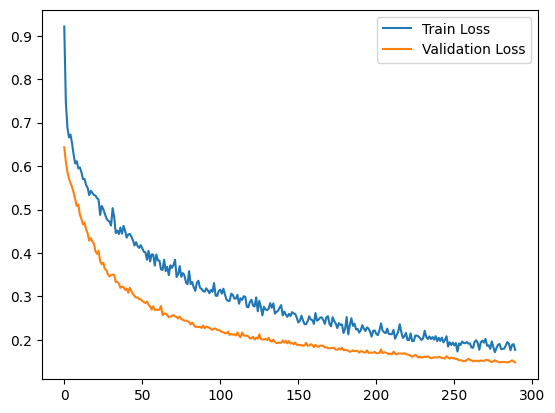

In [45]:
# Veri yükleyicilerini oluşturma
batch_size = 16
train_loader = DataLoader(TensorDataset(train_x, train_y), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(valid_x, valid_y), batch_size=batch_size, shuffle=False)

torch.manual_seed(180401002) 

model = MLP()

# Optimizasyon ve kayıp fonksiyonu tanımı
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.01)
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()
l1_lambda = 0.000001


# Eğitim döngüsü
num_epochs = 1000
patience = 10
train_losses = []
val_losses = []
best_val_loss = None
for epoch in range(num_epochs):
    # Eğitim aşaması
    model.train()
    train_loss = 0.0
    train_count = 0.0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch).squeeze()
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        loss = criterion(y_pred, y_batch) + l1_lambda * l1_norm
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()
    #train_loss /= train_count #len(train_loader)
    #train_losses.append(train_loss)

    # Doğrulama aşaması
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            y_pred = model(x_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()
    #val_loss /= len(val_loader)
    #val_losses.append(val_loss)

    # calculate metrics
    train_loss /= train_count
    val_loss /= len(val_loader)

    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",val_loss)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    #en iyi modeli tutmak icin
    val_score = val_loss
    if best_val_loss is None:
        best_val_loss = val_score # hafızada patience boyu tutmaya başla
        torch.save(model.state_dict(), "checkpoint.pt")
    elif best_val_loss < val_score: # patience counter
        patience_counter += 1
        print("Earlystopping Patience Counter:",patience_counter)
        if patience_counter == patience:
            break
    else:
        best_val_loss = val_score
        torch.save(model.state_dict(), "checkpoint.pt") # to keep the best model
        patience_counter = 0

# Eğitim ve doğrulama kayıplarını görselleştirme
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

# Modeli test etme:

In [46]:
# Test aşaması
model.eval()
with torch.no_grad():
    y_pred = model(test_x).squeeze().numpy()
    y_pred_rounded = [round(pred) for pred in y_pred]
    acc = accuracy_score(test_y, y_pred_rounded)
    f1 = f1_score(test_y, y_pred_rounded)
    precision = precision_score(test_y, y_pred_rounded)
    recall = recall_score(test_y, y_pred_rounded)

# Test sonuçlarını yazdırma
print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.9469
F1 Score: 0.9456
Precision: 0.9753
Recall: 0.9175
